## Importing Libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import accuracy_score


## Importing Datasets

In [236]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


## Preprocessing

### Imputing Missing Values

#### Getting Rid of Columns with only a Few Values

In [237]:
train_df = train_df.dropna(subset=['Embarked'])


#### Using LR to predict missing values of Age

In [238]:
train_df_missing = train_df[['Pclass', 'SibSp', 'Parch', 'Age']]
train_missing = train_df_missing[train_df_missing["Age"].isnull()]
train_df_missing = train_df_missing.dropna()

y_train_missing = train_df_missing["Age"]
X_train_missing = train_df_missing.drop("Age", axis=1)
X_test_missing = train_missing.drop("Age", axis=1)

lr = LinearRegression()
lr.fit(X_train_missing, y_train_missing)

y_pred_missing = lr.predict(X_test_missing)
train_df.loc[train_df.Age.isnull(), 'Age'] = y_pred_missing

In [239]:
test_df_missing = test_df[['Pclass', 'SibSp', 'Parch', 'Age']]
test_missing = test_df_missing[test_df_missing["Age"].isnull()]
test_df_missing = test_df_missing.dropna()

y_train_missing = test_df_missing["Age"]
X_train_missing = test_df_missing.drop("Age", axis=1)
X_test_missing = test_missing.drop("Age", axis=1)

lr = LinearRegression()
lr.fit(X_train_missing, y_train_missing)

y_pred_missing = lr.predict(X_test_missing)
test_df.loc[test_df.Age.isnull(), 'Age'] = y_pred_missing

#### Looking at Nulls

In [240]:
# We are getting rid of the Cabin column, so I don't bother to remove it.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [241]:
# We are getting rid of the Cabin column, so I don't bother to remove it.
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Checking for Noise

In [242]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.242737,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.577986,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,-6.622503,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,27.702111,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


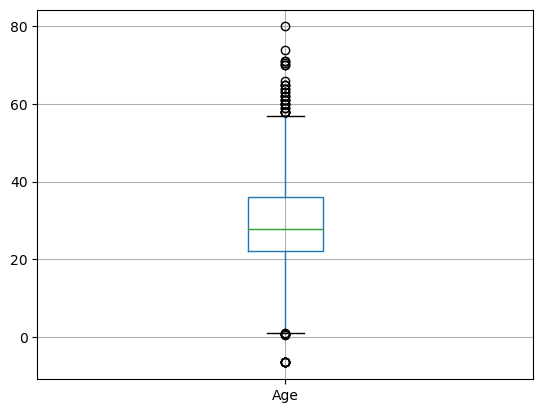

In [243]:
train_df.boxplot(column='Age')
plt.show()

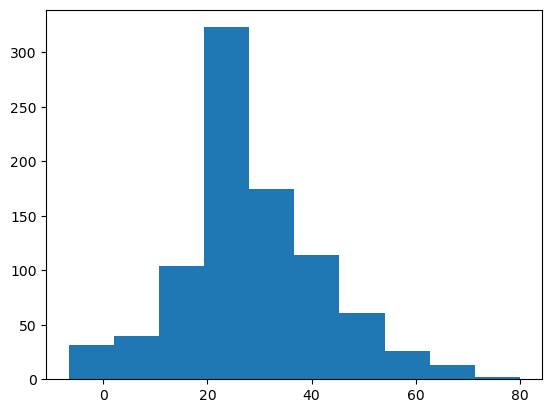

In [244]:
plt.hist(train_df['Age'])
plt.show()

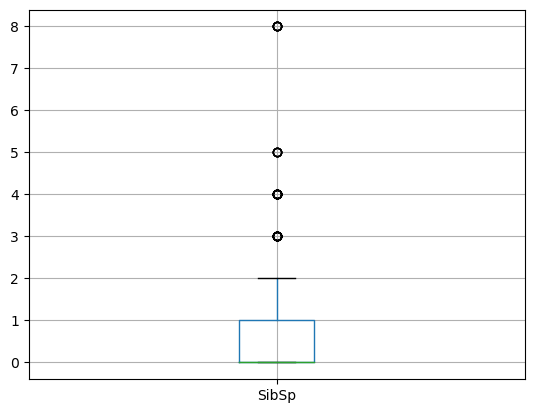

In [245]:
train_df.boxplot(column='SibSp')
plt.show()


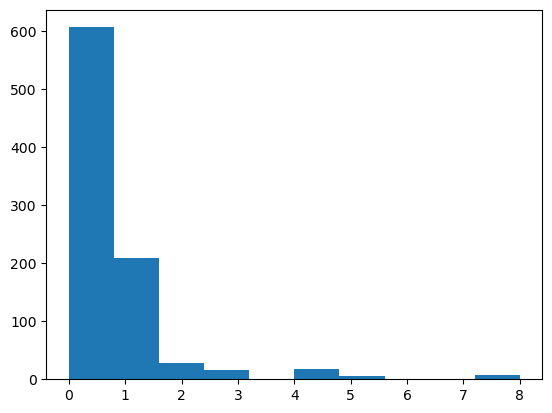

In [246]:
plt.hist(train_df['SibSp'])
plt.show()

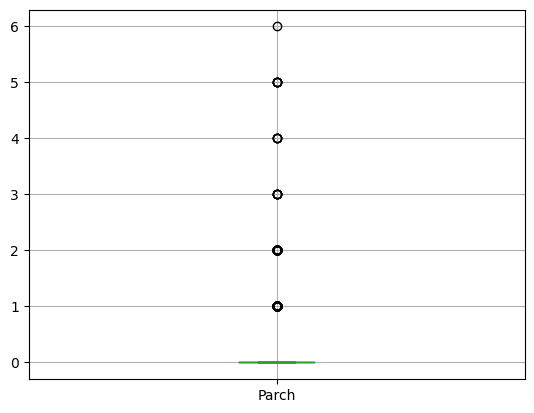

In [247]:
train_df.boxplot(column='Parch')
plt.show()


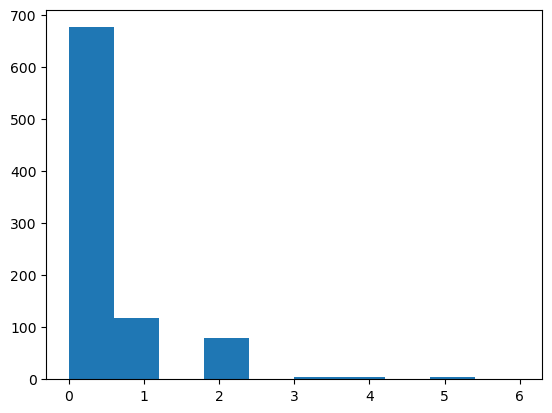

In [248]:
plt.hist(train_df['Parch'])
plt.show()

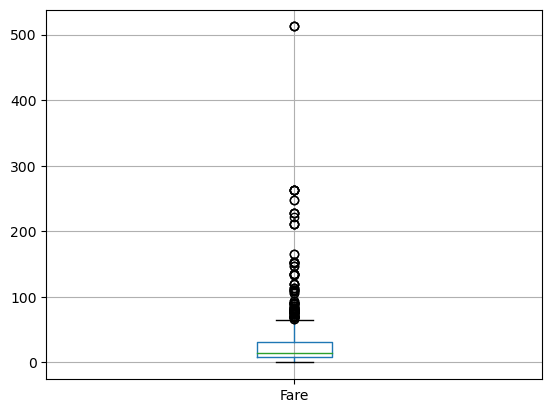

In [249]:
train_df.boxplot(column='Fare')
plt.show()


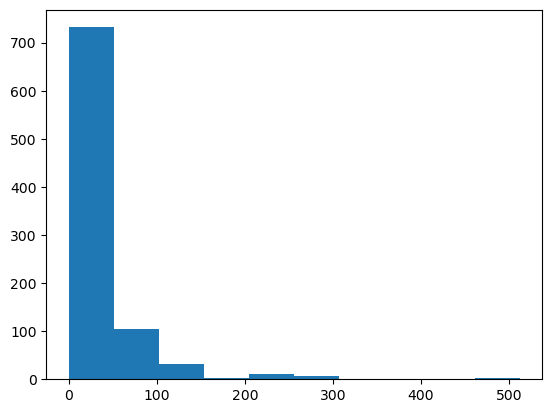

In [250]:
plt.hist(train_df['Fare'])
plt.show()

#### Smoothing out Data

In [251]:
train_df['Age'] = train_df['Age'].rolling(window=3).mean().fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].rolling(window=3).mean().fillna(test_df['Age'].mean())

train_df['SibSp'] = train_df['SibSp'].rolling(window=3).median().fillna(train_df['SibSp'].median())
test_df['SibSp'] = test_df['SibSp'].rolling(window=3).median().fillna(test_df['SibSp'].median())

train_df['Parch'] = train_df['Parch'].rolling(window=3).median().fillna(train_df['Parch'].median())
test_df['Parch'] = test_df['Parch'].rolling(window=3).median().fillna(test_df['Parch'].median())

train_df['Fare'] = train_df['Fare'].rolling(window=3).mean().fillna(train_df['Fare'].mean())
test_df['Fare'] = test_df['Fare'].rolling(window=3).mean().fillna(test_df['Fare'].mean())


### Looking for Inconsistent Data

In [252]:
train_df[train_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [253]:
test_df[test_df.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## EDA

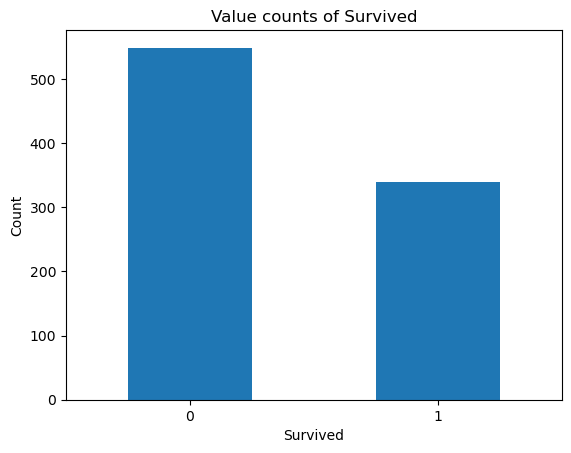

In [254]:
train_df.Survived.value_counts().plot(kind="bar")
plt.title("Value counts of Survived")
plt.xlabel("Survived")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

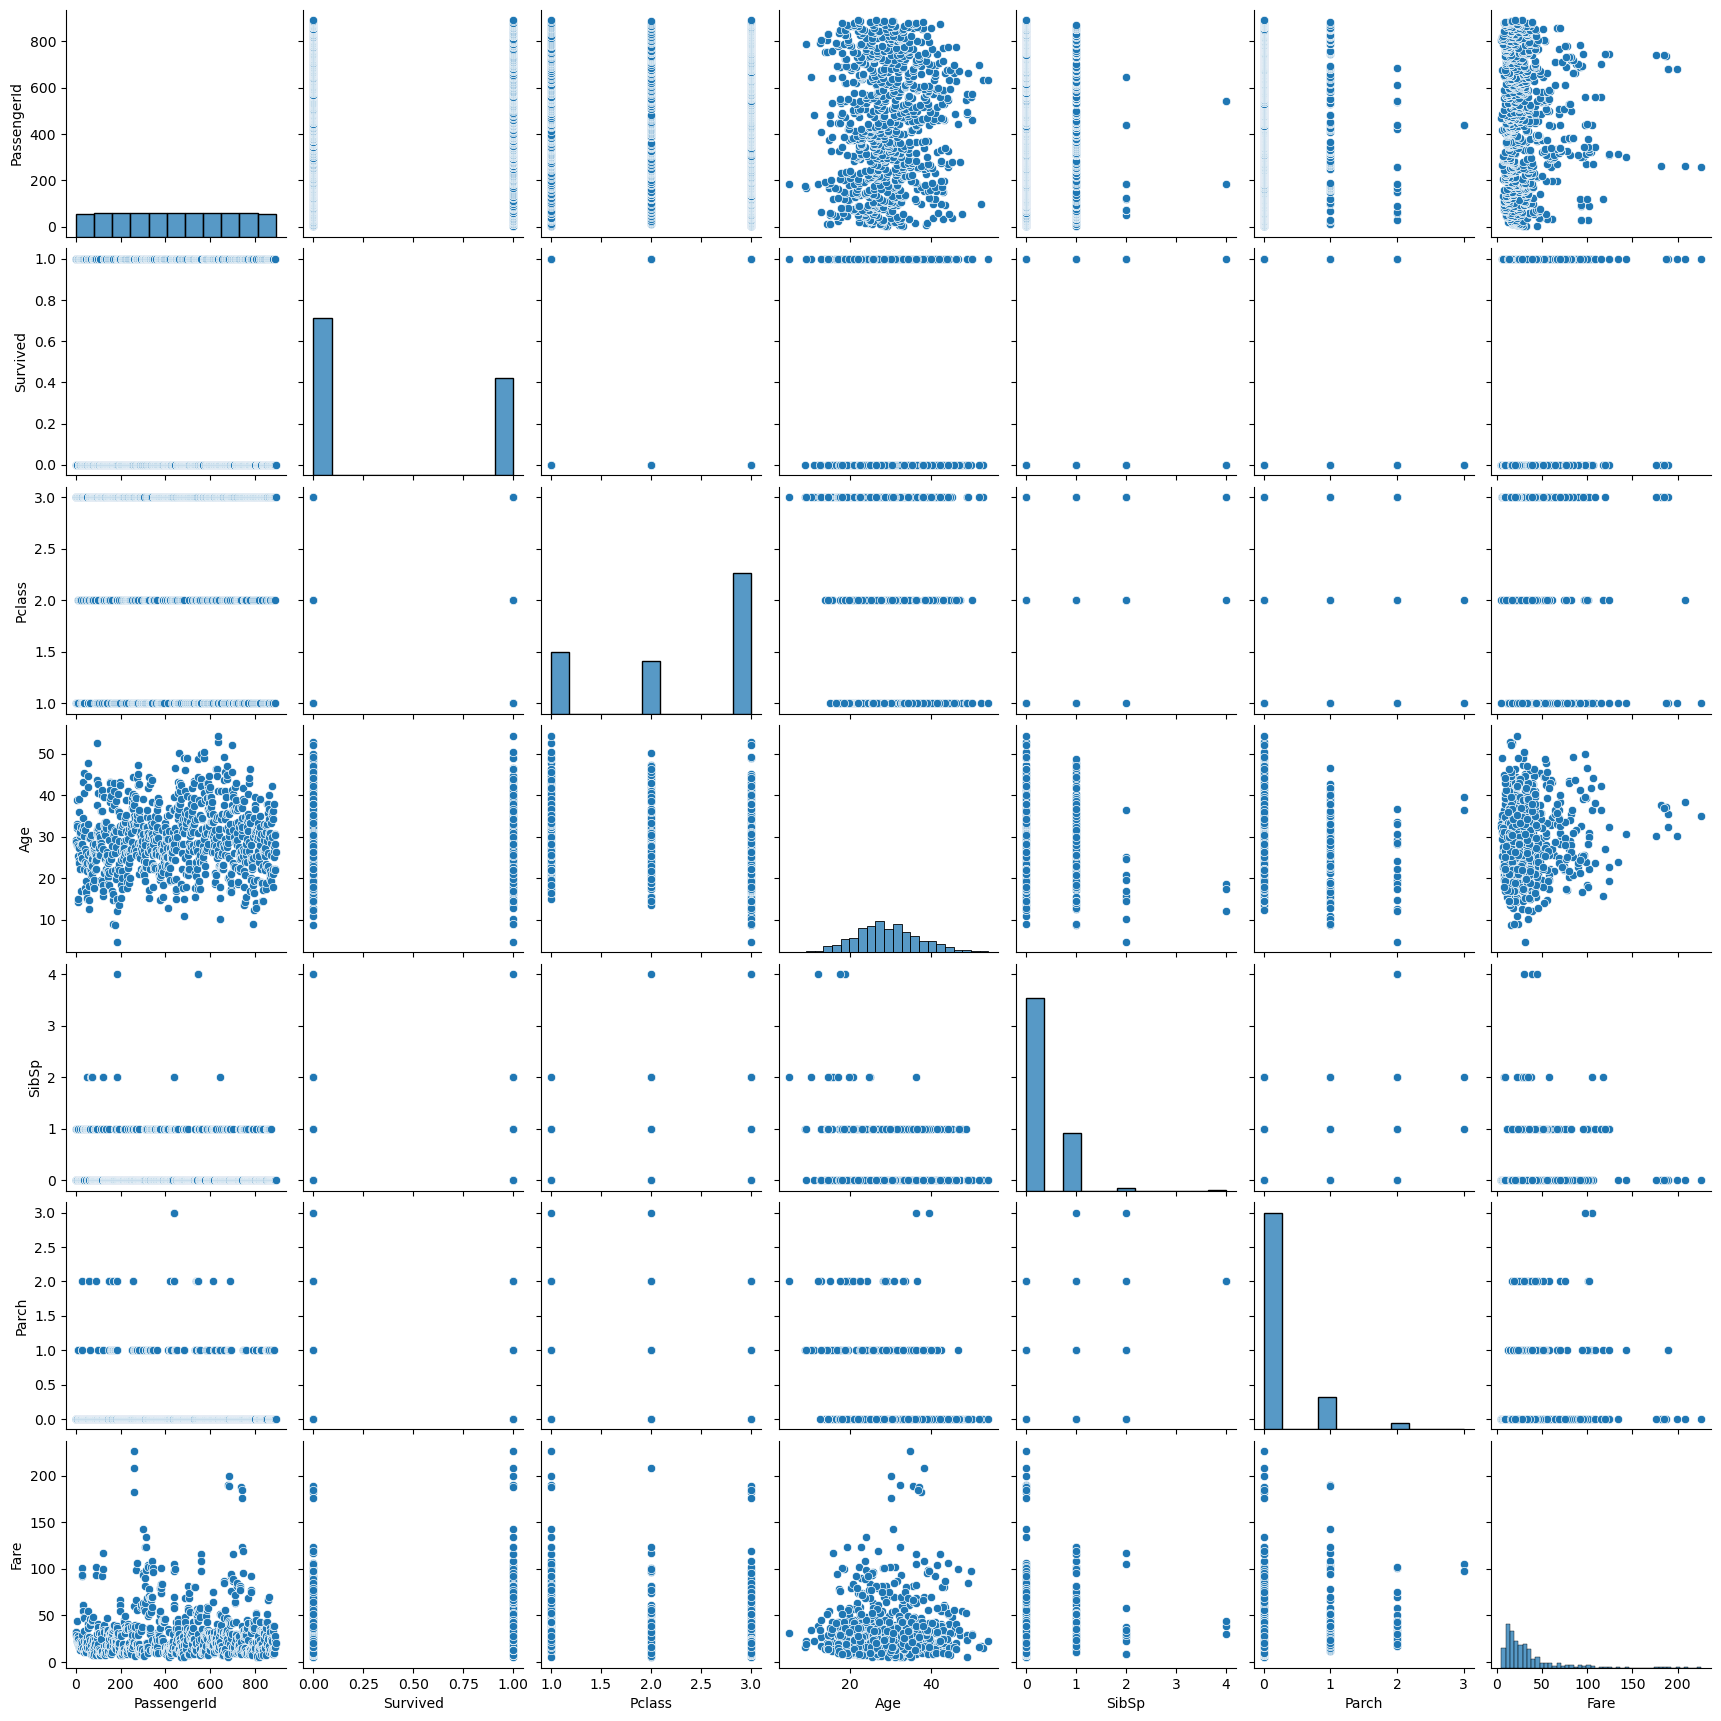

In [255]:
sns.pairplot(train_df)
plt.show()

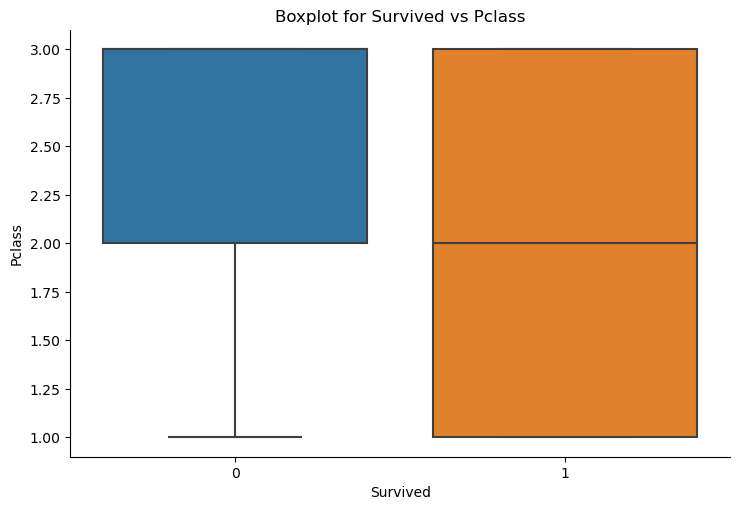

In [256]:
sns.catplot(x="Survived", y="Pclass", data=train_df, kind="box", aspect=1.5)
plt.title("Boxplot for Survived vs Pclass")
plt.show()


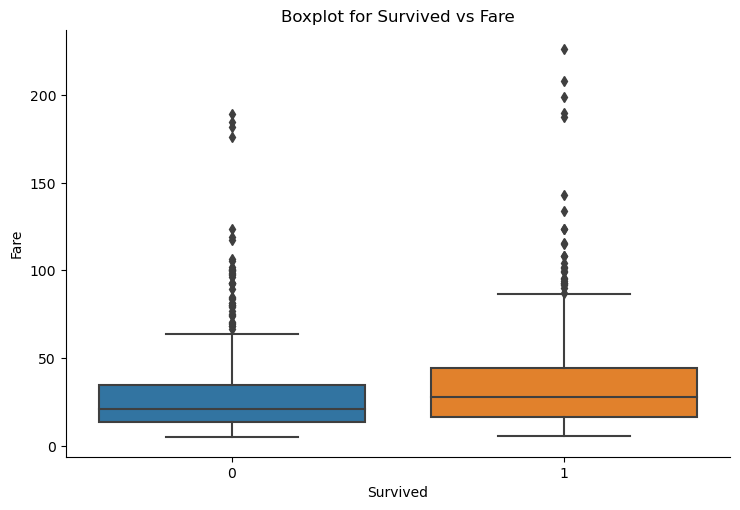

In [257]:
sns.catplot(x="Survived", y="Fare", data=train_df, kind="box", aspect=1.5)
plt.title("Boxplot for Survived vs Fare")
plt.show()


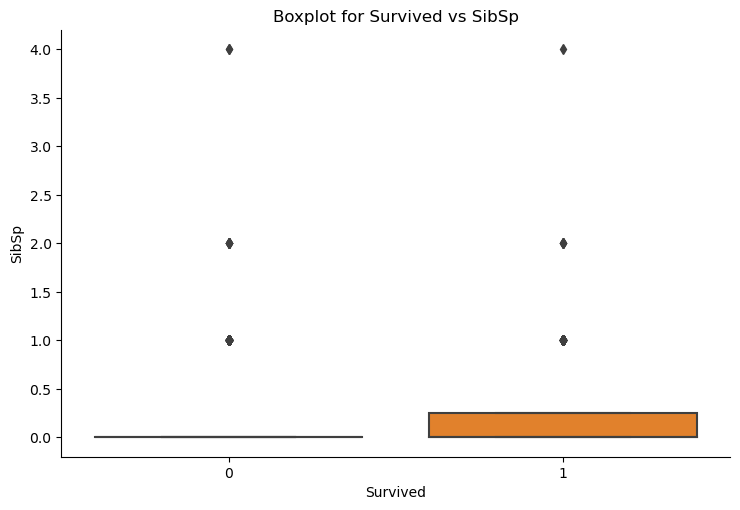

In [258]:
sns.catplot(x="Survived", y="SibSp", data=train_df, kind="box", aspect=1.5)
plt.title("Boxplot for Survived vs SibSp")
plt.show()


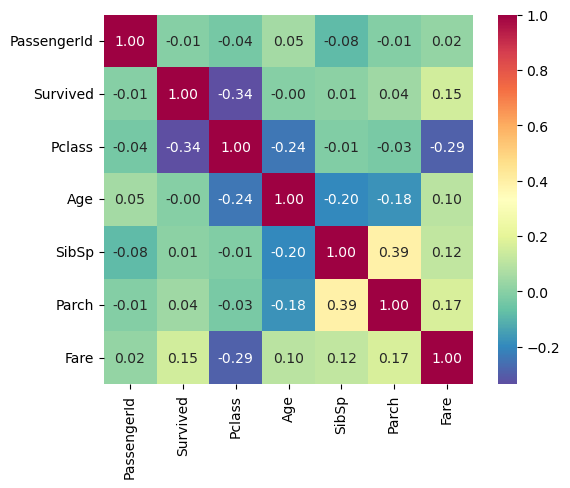

In [259]:
corrmat = train_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 cmap="Spectral_r")
plt.show()

## Machine Learning

In [260]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.242737,0.0,0.0,A/5 21171,32.096681,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.242737,0.0,0.0,PC 17599,32.096681,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,28.666667,1.0,0.0,STON/O2. 3101282,28.819433,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,33.000000,1.0,0.0,113803,44.102767,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,32.000000,0.0,0.0,373450,23.025000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30.333333,0.0,0.0,211536,16.391667,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,28.333333,0.0,0.0,112053,24.041667,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.318783,0.0,0.0,W./C. 6607,22.150000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,21.985449,0.0,0.0,111369,27.816667,C148,C


In [261]:
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df[['Survived']]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [263]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["Pclass", "Sex", "Embarked"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [264]:
pipe = Pipeline([("preprocessor", preprocessor),  ("classifier", LogisticRegression())], verbose = True)


In [265]:
pipe.fit(X_train, y_train)


[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


C:\Users\varun\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000018B473EDEE0>))]),
                                                 

In [266]:
print(accuracy_score(y_test, pipe.predict(X_test)))


0.8089887640449438


In [267]:
features = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


In [268]:
test_pred = pipe.predict(features)

In [269]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': test_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [270]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
